# CPSC6300 Final Exam Question 38
# Author: Wenkang Wei 

# Download Dataset

In [1]:
import pandas as pd
import requests
import numpy as np
import os

def download_data(data_url, file_path="."):
    r = requests.get(data_url, verify=False)
    with open(file_path, "wb") as f:
        f.write(r.content)
def load_data(data_url, local_cached_datafile):
    if not os.path.exists(local_cached_datafile):
        if not os.path.exists(os.path.dirname(local_cached_datafile)):
            os.makedirs(os.path.dirname(local_cached_datafile))
        download_data(data_url, local_cached_datafile)
    return pd.read_csv(local_cached_datafile)


data_url = "https://www.palmetto.clemson.edu/dsci/datasets/exams/noisy_data.csv"

data_input_dir = os.path.join(os.getcwd(), 'noisy_data.csv')
# download training set and test set

download_data(data_url, data_input_dir)


/zfs/courses/CPSC6300/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.palmetto.clemson.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [2]:
train_df = pd.read_csv("noisy_data.csv")

In [3]:
train_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,7.704058,2.593040,3.158773,9.437104,12.258002,3.558676,-1.395969,3.236902,-5.359782,-2.790887,...,1.579396,4.892746,-0.279460,-0.802455,3.841371,11.440503,16.434667,-1.191107,-2.805147,1.120813
1,3.079911,-4.823572,-2.597777,9.417419,15.212282,11.738309,-3.388358,-2.533977,-4.327964,2.380692,...,1.445756,-1.095903,-0.241618,-0.450031,-5.745342,13.030065,18.011364,4.999147,-0.768981,-3.061437
2,3.209946,-2.318349,-0.804635,-1.410793,7.727956,10.021168,1.161181,-1.814144,3.598527,-2.019500,...,-2.682706,-7.427769,1.721338,-2.384767,-0.826735,3.088506,7.323719,16.101807,6.648281,5.429209
3,3.607772,6.464315,3.208379,10.574569,12.295026,1.000294,-0.858062,2.338387,3.292241,10.312811,...,12.268682,3.567768,-1.790356,2.138321,9.987709,12.509201,10.838760,11.288567,-0.735214,2.985111
4,-6.453400,-2.280661,3.161372,-3.453887,8.847350,-0.663775,-4.783252,-0.145741,1.695841,2.027526,...,-1.536748,7.685215,4.253860,2.444424,-3.081372,0.879007,12.334744,4.803301,-8.092162,6.478665


# PCA for filtering noise

In [4]:
from sklearn.decomposition import PCA
pca_filtering = PCA(0.50)
_ = pca_filtering.fit(train_df)

# filter noise in data using PCA
filtered_df = pca_filtering.transform(train_df)
filtered_df = pca_filtering.inverse_transform(filtered_df)
filtered_df

array([[-0.30719929,  0.25419891,  4.99253088, ...,  3.36625913,
        -2.019777  , -1.29421568],
       [ 0.92225641,  0.54218803, -0.23053638, ...,  7.41412154,
         1.26185591,  0.58329707],
       [ 0.25575837, -0.51603854, -2.83720097, ..., 12.96009522,
         6.63790396,  0.98367065],
       ...,
       [ 0.87317164, -0.03519932,  1.11177402, ..., 10.64474772,
         4.09673403,  1.61116283],
       [ 0.32008689, -0.05940131,  5.13578374, ...,  7.37649035,
         1.73120003,  1.03188923],
       [-0.17743061,  0.6884074 , 10.00434706, ...,  6.98547371,
        -0.24566025,  0.43129415]])

# PCA for Dimension Reduction

In [5]:
# reduce dimension to 2
pca = PCA(n_components=2)
_ = pca.fit(filtered_df)
transformed_df = pca.transform(filtered_df) 
transformed_df

array([[  4.93878466,  17.77803558],
       [-14.87273618, -17.48602562],
       [ -9.4141105 , -15.2506739 ],
       ...,
       [-10.44506742,  -4.1427865 ],
       [ 12.59332358,   7.96661249],
       [  1.66978831,   4.34813286]])

# K-Means Clustering

In [6]:
from sklearn.cluster import KMeans

perform = {"clusters_num":[1,2,4,8,10,16], "within-cluster sum-of-squares":[]}

for cluster_n  in perform["clusters_num"]:
    km = KMeans(n_clusters = cluster_n,random_state=0)
    km_model = km.fit(transformed_df)
    perform["within-cluster sum-of-squares"].append(km.inertia_)

perf_df = pd.DataFrame(perform)    
perf_df

,clusters_num,within-cluster sum-of-squares
0,1,669706.153599
1,2,423968.495287
2,4,184670.337425
3,8,93294.010442
4,10,76518.542376
5,16,49406.363518


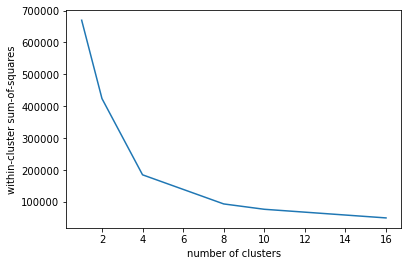

In [7]:
import matplotlib.pyplot as plt
_ = plt.plot(perf_df["clusters_num"],perf_df["within-cluster sum-of-squares"])
_ = plt.xlabel("number of clusters")
_ = plt.ylabel("within-cluster sum-of-squares")